# Extract Intrinsic Currents from Raw ABF files of Voltage Steps

In [4]:
dir_in = r'C:\Users\haley\Dropbox\Projects\All Olive\Intrinsic\ABF\CaMK Cre\-55 mV'
#dir_in = dir_in.replace (r'\', r'\\\')
file_in = '2019_08_08_0025.abf'
dir_out = dir_in + '\\Analyzed'

os.chdir (dir_in)
abf = pyabf.ABF(file_in)

## Read in the data

In [3]:
import pyabf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.metrics import auc


## Function Definitions

## Set up the data frame

In [5]:
columns = {'filename':[], 'vstep':[], 'baseline':[],'h_peak':[],'ss_peak':[],'ahp_peak':[],'ca_peak':[],'i_h':[],'i_ahp':[],'i_ca':[],'i_input':[],'r_input':[]}

channels = [0,2]
sweep_list = abf.sweepList # Get all sweeps in the file
step_list = list([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55])



## Analyze the raw traces for relevant peaks for Ch1

,filename,vstep,baseline,i_ss,i_h,i_ahp,i_ca,r_input,h_peak,ss_peak,ahp_peak,ca_peak,i_input
0,2019_08_08_0025.abf,-55.0,-34.774174,-27.591549,-1.721191,4.866947,-34.805904,1993.363988,-64.086914,-62.365723,-29.907227,-69.580078,-27.591549
0,2019_08_08_0025.abf,-45.0,-29.770508,-20.120853,0.452885,3.525391,-26.992188,2236.485653,-49.438477,-49.891361,-26.245117,-56.762695,-20.120853
0,2019_08_08_0025.abf,-35.0,-26.776123,-13.137814,-0.369267,1.751709,-20.220947,2664.065814,-40.283203,-39.913937,-25.024414,-46.997070,-13.137814
0,2019_08_08_0025.abf,-25.0,-25.904541,-9.234005,1.569210,1.490479,-14.989014,2707.384290,-33.569336,-35.138546,-24.414062,-40.893555,-9.234005
0,2019_08_08_0025.abf,-15.0,-25.972900,-4.130859,0.196533,1.558838,-6.375732,3631.205674,-29.907227,-30.103760,-24.414062,-32.348633,-4.130859
0,2019_08_08_0025.abf,-5.0,-25.338135,-0.069580,1.604004,0.924072,-1.517334,71859.649123,-23.803711,-25.407715,-24.414062,-26.855469,-0.069580
0,2019_08_08_0025.abf,5.0,-25.361328,3.842773,5.649414,0.947266,-11.870117,1301.143583,-15.869141,-21.518555,-24.414062,-37.231445,3.842773
0,2019_08_08_0025.abf,15.0,-25.085449,7.557373,10.203857,-0.549316,-23.742676,1984.816669,-7.324219,-17.528076,-25.634766,-48.828125,7.557373
0,2019_08_08_0025.abf,25.0,-26.600342,12.875977,14.334717,0.355225,-31.993408,1941.600303,0.610352,-13.724365,-26.245117,-58.593750,12.875977
0,2019_08_08_0025.abf,35.0,-27.142334,17.503052,16.963501,0.897217,-41.217041,1999.651288,7.324219,-9.639282,-26.245117,-68.359375,17.503052


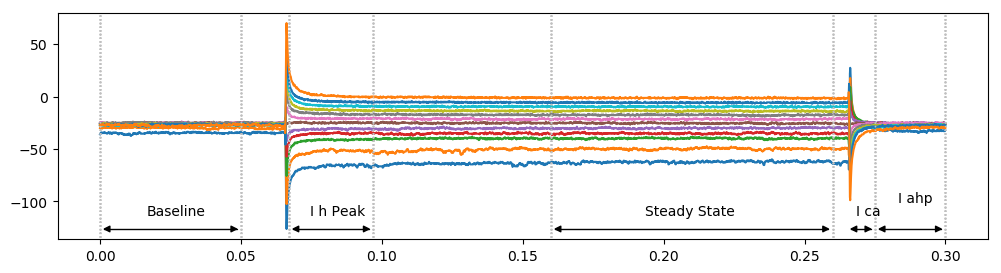

In [6]:
channel = 0
x1 = np.nan
x2 = np.nan
y1 = np.nan
y2 = np.nan

baseline_start = 0 * abf.dataPointsPerMs 
baseline_end = 50 * abf.dataPointsPerMs 
h_start = 67  * abf.dataPointsPerMs 
h_end = 97  * abf.dataPointsPerMs
ss_start = 160 * abf.dataPointsPerMs 
ss_end = 260  * abf.dataPointsPerMs 
ahp_start = 275 * abf.dataPointsPerMs 
ahp_end = 300  * abf.dataPointsPerMs 
ca_start = 265 * abf.dataPointsPerMs 
ca_end = 275 * abf.dataPointsPerMs 
        
df = pd.DataFrame.from_dict (columns)   
file_out = file_in.replace('.abf','') + '_Ch_' + str(channel) + '.csv' 
i = 0
fig, ax = plt.subplots(1,1, figsize=(12, 3), dpi = 100)
for sweep in sweep_list:
    
    filename = file_in
    vstep = step_list[i]
    abf.setSweep (sweepNumber = sweep, channel = channel)    
    x = abf.sweepX[baseline_start:ahp_end]
    y = abf.sweepY[baseline_start:ahp_end]
    x_min = min(x)
    x_max = max(x)
    y_min = min (y)
    y_max = max(y)
    
    
    sf = abf.dataPointsPerMs  *1000 # scale factor for referencing time on the plotted data (points/sec)
    baseline = np.average (abf.sweepY [baseline_start: baseline_end])
    h_peak = np.max (abf.sweepY [h_start: h_end])
    ss_peak = np.average (abf.sweepY [ss_start: ss_end])
    ahp_peak = np.max (abf.sweepY [ahp_start: ahp_end])
    ca_peak = np.min (abf.sweepY [ca_start: ca_end])
    
    i_ss = ss_peak - baseline
    i_h = h_peak - ss_peak
    i_ahp = ahp_peak - baseline
    i_ca = ca_peak - baseline
    i_input = ss_peak - baseline
    r_input = vstep/i_input * 1000
    df = df.append ([{'filename':filename, 'vstep':vstep, 'baseline':baseline, 'h_peak':h_peak, 
                          'ss_peak':ss_peak, 'ahp_peak':ahp_peak, 'ca_peak':ca_peak, 'i_ss':i_ss,'i_h':i_h,'i_ahp':i_ahp, 
                          'i_ca':i_ca, 'i_input':i_input, 'r_input': r_input}], sort = False)
    df = df[['filename', 'vstep', 'baseline', 'i_ss','i_h','i_ahp','i_ca', 'r_input', 'h_peak', 'ss_peak', 'ahp_peak',
        'ca_peak', 'i_input']]
    
    ax.plot (x, y, linestyle = 'solid')
      
    ax.axvline(baseline_start/sf, y_min, y_max, color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(baseline_end/sf  , y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(h_start/sf, y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(h_end/sf, y_min, y_max, color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(ahp_start/sf, y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(ahp_end/sf, y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(ss_start/sf,y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(ss_end/sf, y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
        
    if i == 0:
        ax.annotate('Baseline', xy=((baseline_end/sf - baseline_start/sf)/3, y_min - y_min *0.1), color = 'black') 
        ax.annotate('', xy=(baseline_start/sf, y_min), xytext = (baseline_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))
        ax.annotate('I h Peak', xy=(h_start/sf + (h_end/sf - h_start/sf)/4, y_min - y_min *0.1)) 
        ax.annotate('', xy=(h_start/sf, y_min), xytext = (h_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))
        ax.annotate('Steady State', xy=(ss_start/sf + (ss_end/sf - ss_start/sf)/3, y_min - y_min *0.1)) 
        ax.annotate('', xy=(ss_start/sf, y_min), xytext = (ss_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))
        ax.annotate('I ahp', xy=(ahp_start/sf + (ahp_end/sf - ahp_start/sf)/3, y_min - y_min *0.2)) 
        ax.annotate('I ca', xy=(ca_start/sf + (ca_end/sf - ca_start/sf)/3, y_min - y_min *0.1)) 
        ax.annotate('', xy=(ahp_start/sf, y_min), xytext = (ahp_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))
        ax.annotate('', xy=(ca_start/sf, y_min), xytext = (ca_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))

        
    i = i + 1
    
display(HTML(df.to_html()))
    
try:
    os.stat(dir_out)
except:
    os.makedirs(dir_out)
    
# Write data to file
os.chdir(dir_out)
df.to_csv(file_out, index = False)
       


,filename,vstep,baseline,i_ss,i_h,i_ahp,i_ca,r_input,h_peak,ss_peak,ahp_peak,ca_peak,i_input
0,2019_08_08_0025.abf,-55.0,-7.159424,-155.756226,20.703735,1.055908,-540.936279,353.115901,-142.211914,-162.915649,-6.103516,-548.095703,-155.756226
0,2019_08_08_0025.abf,-45.0,-6.956787,-115.343628,14.268188,8.787842,-482.545166,390.138587,-108.032227,-122.300415,1.831055,-489.501953,-115.343628
0,2019_08_08_0025.abf,-35.0,-4.344482,-45.720825,1.237183,4.954834,-50.587158,765.515492,-48.828125,-50.065308,0.610352,-54.931641,-45.720825
0,2019_08_08_0025.abf,-25.0,-4.355469,-28.845215,1.462402,4.965820,-32.265625,866.694879,-31.738281,-33.200684,0.610352,-36.621094,-28.845215
0,2019_08_08_0025.abf,-15.0,-4.548340,-13.620605,1.689453,3.327637,-16.203613,1101.272630,-16.479492,-18.168945,-1.220703,-20.751953,-13.620605
0,2019_08_08_0025.abf,-5.0,-4.373779,0.943604,0.988770,2.542725,-1.119385,-5298.835705,-2.441406,-3.430176,-1.831055,-5.493164,0.943604
0,2019_08_08_0025.abf,5.0,-2.845459,9.385376,8.108521,2.235107,-8.751221,532.743708,14.648438,6.539917,-0.610352,-11.596680,9.385376
0,2019_08_08_0025.abf,15.0,-1.510010,12.565308,13.358765,2.120361,-14.359131,1193.763054,24.414062,11.055298,0.610352,-15.869141,12.565308
0,2019_08_08_0025.abf,25.0,-1.699219,17.853394,21.687622,1.699219,-22.714844,1400.294007,37.841797,16.154175,0.000000,-24.414062,17.853394
0,2019_08_08_0025.abf,35.0,-1.418457,22.022705,31.885986,3.249512,-52.902832,1589.268888,52.490234,20.604248,1.831055,-54.321289,22.022705


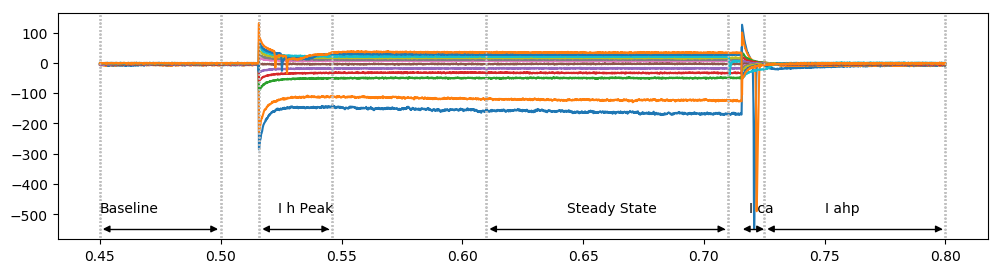

In [7]:
channel = 2
x1 = np.nan
x2 = np.nan
y1 = np.nan
y2 = np.nan

baseline_start = 450  * abf.dataPointsPerMs
baseline_end = 500  * abf.dataPointsPerMs 
h_start = 516 * abf.dataPointsPerMs 
h_end =  546 * abf.dataPointsPerMs
ss_start =  610 * abf.dataPointsPerMs
ss_end = 710  * abf.dataPointsPerMs
ahp_start =  725 * abf.dataPointsPerMs
ahp_end = 800  * abf.dataPointsPerMs
ca_start = 715 * abf.dataPointsPerMs
ca_end = 726* abf.dataPointsPerMs
        
df = pd.DataFrame.from_dict (columns)   
file_out = file_in.replace('.abf','') + '_Ch_' + str(channel) + '.csv' 
i = 0
fig, ax = plt.subplots(1,1, figsize=(12, 3), dpi = 100)
for sweep in sweep_list:
    filename = file_in
    vstep = step_list[i]
    abf.setSweep (sweepNumber = sweep, channel = channel)    
    x = abf.sweepX[baseline_start:ahp_end]
    y = abf.sweepY[baseline_start:ahp_end]
    x_min = min(x)
    x_max = max(x)
    y_min = min (y)
    y_max = max(y)
    sf = abf.dataPointsPerMs  *1000 # scale factor for referencing time on the plotted data (points/sec)
    baseline = np.average (abf.sweepY [baseline_start: baseline_end])
    h_peak = np.max (abf.sweepY [h_start: h_end])
    ss_peak = np.average (abf.sweepY [ss_start: ss_end])
    ahp_peak = np.max (abf.sweepY [ahp_start: ahp_end])
    ca_peak = np.min (abf.sweepY [ca_start: ca_end])
    
    i_ss = ss_peak - baseline
    i_h = h_peak - ss_peak
    i_ahp = ahp_peak - baseline
    i_ca = ca_peak - baseline
    i_input = ss_peak - baseline
    r_input = vstep/i_input * 1000
    df = df.append ([{'filename':filename, 'vstep':vstep, 'baseline':baseline, 'h_peak':h_peak, 
                          'ss_peak':ss_peak, 'ahp_peak':ahp_peak, 'ca_peak':ca_peak, 'i_ss':i_ss,'i_h':i_h,'i_ahp':i_ahp, 
                          'i_ca':i_ca, 'i_input':i_input, 'r_input': r_input}], sort = False)
    df = df[['filename', 'vstep', 'baseline', 'i_ss','i_h','i_ahp','i_ca', 'r_input', 'h_peak', 'ss_peak', 'ahp_peak',
        'ca_peak', 'i_input']]
    
    
    ax.plot (x, y, linestyle = 'solid')
  
    ax.axvline(baseline_start/sf, y_min, y_max, color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(baseline_end/sf  , y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(h_start/sf, y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(h_end/sf, y_min, y_max, color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(ahp_start/sf, y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(ahp_end/sf, y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(ss_start/sf,y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
    ax.axvline(ss_end/sf, y_min, y_max , color = 'silver', lw = 1, linestyle = ':')
        
    if i == 0:
        ax.annotate('Baseline', xy=(baseline_start/sf, y_min - y_min *0.1), color = 'black') 
        ax.annotate('', xy=(baseline_start/sf, y_min), xytext = (baseline_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))
        ax.annotate('I h Peak', xy=(h_start/sf + (h_end/sf - h_start/sf)/4, y_min - y_min *0.1)) 
        ax.annotate('', xy=(h_start/sf, y_min), xytext = (h_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))
        ax.annotate('Steady State', xy=(ss_start/sf + (ss_end/sf - ss_start/sf)/3, y_min - y_min *0.1)) 
        ax.annotate('', xy=(ss_start/sf, y_min), xytext = (ss_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))
        ax.annotate('I ahp', xy=(ahp_start/sf + (ahp_end/sf - ahp_start/sf)/3, y_min - y_min *0.1)) 
        ax.annotate('I ca', xy=(ca_start/sf + (ca_end/sf - ca_start/sf)/3, y_min - y_min *0.1)) 
        ax.annotate('', xy=(ahp_start/sf, y_min), xytext = (ahp_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))
        ax.annotate('', xy=(ca_start/sf, y_min), xytext = (ca_end/sf, y_min), arrowprops=dict(arrowstyle="<|-|>", connectionstyle = "bar, fraction = 0", color = 'black'))

        
    i = i + 1
    
display(HTML(df.to_html()))
   
try:
    os.stat(dir_out)
except:
    os.makedirs(dir_out)
    
# Write data to file
os.chdir(dir_out)
df.to_csv(file_out, index = False)
       

